In [ ]:
import math
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
trans = transforms.Compose([transforms.ToTensor()])

In [ ]:
data_root = '/content/drive/MyDrive/Colab Notebooks/Data/image classifier_train'

In [ ]:
trainset = torchvision.datasets.ImageFolder(root = data_root,transform = trans)

In [ ]:
trainset

Dataset ImageFolder
    Number of datapoints: 132
    Root location: /content/drive/MyDrive/Colab Notebooks/Data/image classifier_train
    StandardTransform
Transform: Compose(
               Resize(size=(100, 100), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )

In [ ]:
trainset.__getitem__(0) # 값을 확인할 수 있음

(tensor([[[0.5098, 0.5137, 0.5059,  ..., 0.5098, 0.5255, 0.5255],
          [0.5176, 0.5137, 0.4980,  ..., 0.5216, 0.5255, 0.5176],
          [0.5176, 0.5216, 0.5137,  ..., 0.5176, 0.5137, 0.5059],
          ...,
          [0.4549, 0.4549, 0.4549,  ..., 0.4549, 0.4471, 0.4392],
          [0.4588, 0.4549, 0.4510,  ..., 0.4510, 0.4471, 0.4392],
          [0.4549, 0.4549, 0.4510,  ..., 0.4510, 0.4510, 0.4471]],
 
         [[0.4745, 0.4784, 0.4706,  ..., 0.4745, 0.4863, 0.4863],
          [0.4824, 0.4784, 0.4627,  ..., 0.4863, 0.4863, 0.4824],
          [0.4824, 0.4824, 0.4784,  ..., 0.4863, 0.4824, 0.4706],
          ...,
          [0.4706, 0.4706, 0.4706,  ..., 0.4784, 0.4706, 0.4627],
          [0.4745, 0.4706, 0.4667,  ..., 0.4784, 0.4706, 0.4627],
          [0.4667, 0.4667, 0.4667,  ..., 0.4745, 0.4745, 0.4706]],
 
         [[0.4471, 0.4471, 0.4431,  ..., 0.4510, 0.4627, 0.4627],
          [0.4471, 0.4431, 0.4275,  ..., 0.4588, 0.4588, 0.4549],
          [0.4471, 0.4471, 0.4431,  ...,

In [ ]:
classes = trainset.classes
classes

['Giphil', 'Jeonjin', 'Jongsin']

In [ ]:
batch_size = 30

In [ ]:
train_loader = DataLoader(
    trainset, batch_size = batch_size,
    shuffle = True
)

In [ ]:
for images, labels in train_loader:
    break

print(images.shape)
print(labels.shape)

torch.Size([30, 3, 100, 100])
torch.Size([30])


In [ ]:
data_root_test = '/content/drive/MyDrive/Colab Notebooks/Data/image classifier_test'

In [ ]:
trans = transforms.Compose([transforms.Resize((100, 100)),
                            transforms.ToTensor()
                            ])

trainset = torchvision.datasets.ImageFolder(root = data_root,
                                            transform = trans)
testset = torchvision.datasets.ImageFolder(root = data_root_test,
                                            transform = trans)

In [ ]:
train_loader = DataLoader(
    trainset, batch_size = batch_size,
    shuffle = True
)

In [ ]:
test_loader = DataLoader(
    trainset, batch_size = batch_size,
    shuffle = True
)

In [ ]:
# 몇 개의 그룹으로 데이터를 가져올 수 있는가
print(len(train_loader))

#데이터로더로부터 가장 처음 한 세트를 가져옴
for images, labels in train_loader:
    break

print(images.shape) # (배치사이즈, RGB, 그림 행, 열)
print(labels.shape)

5
torch.Size([30, 3, 100, 100])
torch.Size([30])


In [ ]:
img = torchvision.utils.make_grid(images, nrow = 5).numpy()

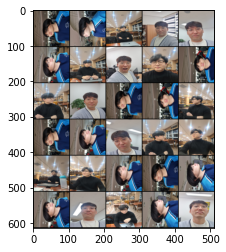

In [ ]:
plt.imshow(np.transpose(img, (1, 2, 0)))

In [ ]:
np.transpose(img, (1, 2, 0)).shape # 그리드 픽셀이 하나에 2픽셀을 잡아먹기때문에 

(614, 512, 3)

In [ ]:
labels

tensor([1, 1, 2, 0, 0, 1, 2, 0, 2, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1,
        1, 1, 0, 2, 1, 0])

In [ ]:
for j in range(30):
    print(classes[labels[j]])

Jeonjin
Jeonjin
Jongsin
Giphil
Giphil
Jeonjin
Jongsin
Giphil
Jongsin
Jeonjin
Jongsin
Giphil
Jeonjin
Jeonjin
Jongsin
Jeonjin
Jeonjin
Giphil
Jongsin
Jongsin
Jongsin
Jongsin
Jeonjin
Jeonjin
Jeonjin
Jeonjin
Giphil
Jongsin
Jeonjin
Giphil


In [ ]:
class CNN_face1(nn.Module):
    def __init__(self): #변수 넣을게 있으면 넣어주기
        super(CNN_face1, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels = 3, out_channels = 32, kernel_size = 3, padding = 1), #in_channels 사진 하나당 RGB 사진이 3개이기때문에  
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, stride = 2)
        )
        self.l1 = nn.Linear(in_features = 32 * 50 * 50, out_features = 50)
        self.l2 = nn.Linear(in_features = 50, out_features = 3)

        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.layer1(x)

        x = x.view(x.size(0), -1)

        x = self.l1(x)
        x = self.relu(x)
        x = self.l2(x)
        return x


In [ ]:
torch.cuda.manual_seed(123)

model1 = CNN_face1()
model1.to(device)
lr = 1e-3 #러닝레이?
optimizer = torch.optim.Adam(model1.parameters(), lr = lr)

In [ ]:
criterion = nn.CrossEntropyLoss()

history_m1 = np.zeros((0,5))

In [ ]:
num_epochs = 30

from tqdm.notebook import tqdm

for epoch in range(num_epochs):
    train_acc_m1, train_loss_m1 = 0, 0
    test_acc_m1, test_loss_m1 = 0, 0
    n_train, n_test = 0, 0

    #훈련 페이즈
    for images, labels in tqdm(train_loader):
        n_train += len(labels)

        #GPU로 전송
        inputs = images.to(device)
        labels = labels.to(device)

        #경사 초기화 
        optimizer.zero_grad()

        #예측 계산
        outputs = model1(inputs)

        #손실 계산
        loss_model1 = criterion(outputs, labels)

        #경사 계산
        loss_model1.backward()

        #파라미터 수정
        optimizer.step()

        #예측 라벨 산출
        pred_m1 = outputs.max(axis = 1)[1]

        #손실과 정확도 계산
        train_loss_m1 += loss_model1.item()
        train_acc_m1 += (pred_m1 == labels).sum().item()
    for images_test, labels_test in test_loader:
        n_test += len(labels_test)

        inputs_test = images_test.to(device)
        labels_test = labels_test.to(device)

            #예측 계산
        outputs_test = model1(inputs_test)

        #손실 계산
        loss_test_model1 = criterion(outputs_test, labels_test)

        #예측 라벨 산출
        pred_test_m1 = outputs_test.max(axis = 1)[1]

        #손실과 정확도 계산
        test_loss_m1 += loss_test_model1.item()
        test_acc_m1 += (pred_test_m1 == labels_test).sum().item()
    train_acc_m1 = train_acc_m1 / n_train
    test_acc_m1 = test_acc_m1 / n_test
    train_loss_m1 = train_loss_m1 / n_test
    test_loss_m1 = test_loss_m1 / n_test
    print(f'Epoch [{epoch + 1}/{num_epochs}], loss: {train_loss_m1:.5f} loss_test: {train_acc_m1:.5f} loss_test: {test_loss_m1:.5f}, val_acc: {val_acc: 5f}')
    item = np.array([epoch + 1, train_loss_m1, train_acc_m1, test_loss_m1, test_acc_m1])
    history_m1 = np.vstack((history_m1, item))

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [1/30], loss: 0.09314 loss_test: 0.42424 loss_test: 0.01609, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [2/30], loss: 0.02947 loss_test: 0.69697 loss_test: 0.00589, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [3/30], loss: 0.01327 loss_test: 0.81818 loss_test: 0.00248, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [4/30], loss: 0.00750 loss_test: 0.94697 loss_test: 0.00595, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [5/30], loss: 0.00284 loss_test: 0.96970 loss_test: 0.00219, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [6/30], loss: 0.00302 loss_test: 0.95455 loss_test: 0.00087, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [7/30], loss: 0.00051 loss_test: 1.00000 loss_test: 0.00078, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [8/30], loss: 0.00070 loss_test: 1.00000 loss_test: 0.00062, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [9/30], loss: 0.00049 loss_test: 1.00000 loss_test: 0.00035, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [10/30], loss: 0.00027 loss_test: 1.00000 loss_test: 0.00019, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [11/30], loss: 0.00017 loss_test: 1.00000 loss_test: 0.00014, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [12/30], loss: 0.00014 loss_test: 1.00000 loss_test: 0.00011, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [13/30], loss: 0.00010 loss_test: 1.00000 loss_test: 0.00008, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [14/30], loss: 0.00008 loss_test: 1.00000 loss_test: 0.00004, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [15/30], loss: 0.00005 loss_test: 1.00000 loss_test: 0.00003, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [16/30], loss: 0.00003 loss_test: 1.00000 loss_test: 0.00002, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [17/30], loss: 0.00002 loss_test: 1.00000 loss_test: 0.00001, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [18/30], loss: 0.00001 loss_test: 1.00000 loss_test: 0.00001, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [19/30], loss: 0.00001 loss_test: 1.00000 loss_test: 0.00001, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [20/30], loss: 0.00001 loss_test: 1.00000 loss_test: 0.00000, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [21/30], loss: 0.00000 loss_test: 1.00000 loss_test: 0.00000, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [22/30], loss: 0.00000 loss_test: 1.00000 loss_test: 0.00000, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [23/30], loss: 0.00000 loss_test: 1.00000 loss_test: 0.00000, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [24/30], loss: 0.00000 loss_test: 1.00000 loss_test: 0.00000, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [25/30], loss: 0.00000 loss_test: 1.00000 loss_test: 0.00000, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [26/30], loss: 0.00000 loss_test: 1.00000 loss_test: 0.00000, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [27/30], loss: 0.00000 loss_test: 1.00000 loss_test: 0.00000, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [28/30], loss: 0.00000 loss_test: 1.00000 loss_test: 0.00000, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [29/30], loss: 0.00000 loss_test: 1.00000 loss_test: 0.00000, val_acc:  0.454545


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch [30/30], loss: 0.00000 loss_test: 1.00000 loss_test: 0.00000, val_acc:  0.454545


In [ ]:
# 손실과 정확도 확인
print(f'초기상태 : 손실 : {history_m1[0,3]} 정확도 : {history_m1[0,4]:.5f}')
print(f'최종상태 : 손실 : {history_m1[-1,3]} 정확도 : {history_m1[-1,4]:.5f}')

초기상태 : 손실 : 0.016085762869228016 정확도 : 0.75758
최종상태 : 손실 : 1.3510845030506253e-06 정확도 : 1.00000


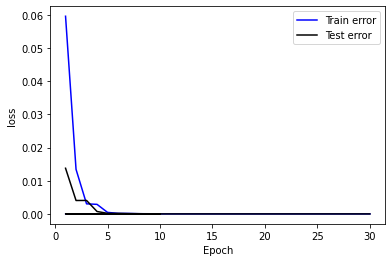

In [ ]:
# 학습 곡선 출력(손실)
plt.plot(history_m1[:,0], history_m1[:,1],'b',label = 'Train error')
plt.plot(history_m1[:,0], history_m1[:,3],'k',label = 'Test error')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

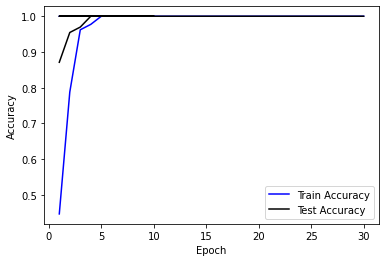

In [ ]:
# 학습 곡선 출력(정확도)
plt.plot(history_m1[:,0], history_m1[:,2],'b',label = 'Train Accuracy')
plt.plot(history_m1[:,0], history_m1[:,4],'k',label = 'Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()